In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [50]:
df=pd.read_csv('gender_classification_v7.csv')
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Avoid line breaks
pd.set_option('display.max_colwidth', None) 
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


In [3]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(1768)

In [5]:
df=df.drop_duplicates()
df.reset_index(drop=True,inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [8]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
3228,1,11.7,6.1,1,1,0,1,Male
3229,1,12.6,5.7,0,0,1,0,Female
3230,1,14.1,7.0,1,1,1,1,Male
3231,1,11.6,5.9,0,0,0,1,Female


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  3233 non-null   int64  
 1   forehead_width_cm          3233 non-null   float64
 2   forehead_height_cm         3233 non-null   float64
 3   nose_wide                  3233 non-null   int64  
 4   nose_long                  3233 non-null   int64  
 5   lips_thin                  3233 non-null   int64  
 6   distance_nose_to_lip_long  3233 non-null   int64  
 7   gender                     3233 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 202.2+ KB


EDA

In [10]:
numerical_column=df.select_dtypes(include=['int64','float64'])
categorical_column=df.select_dtypes(include=['object'])

In [11]:
#univariate-numerical columns

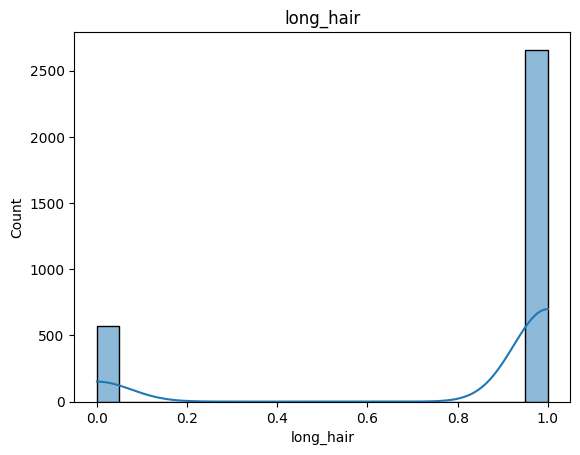

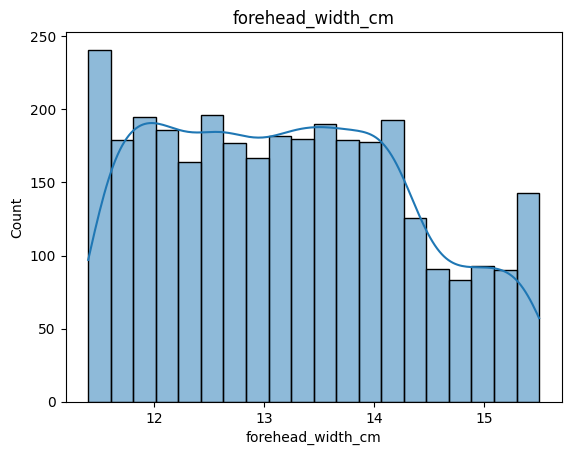

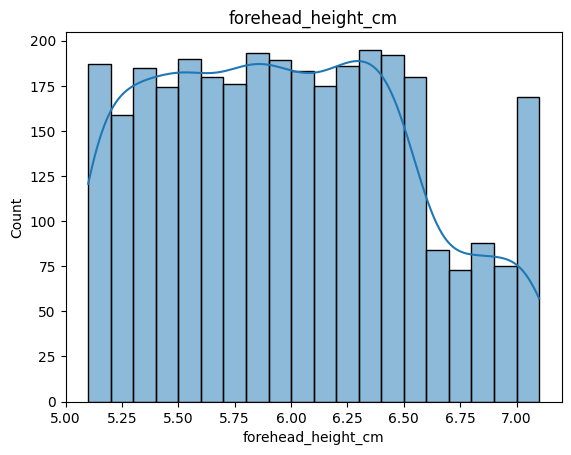

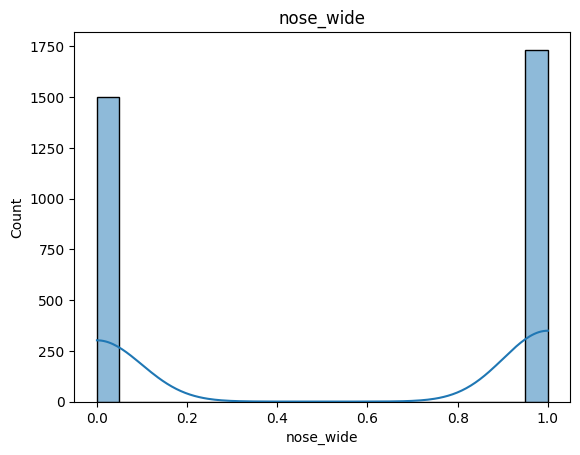

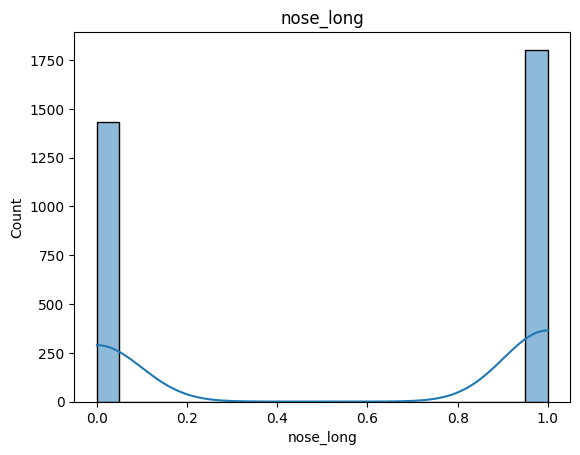

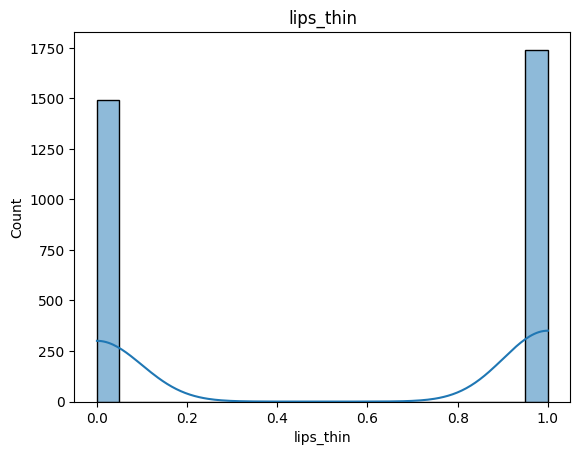

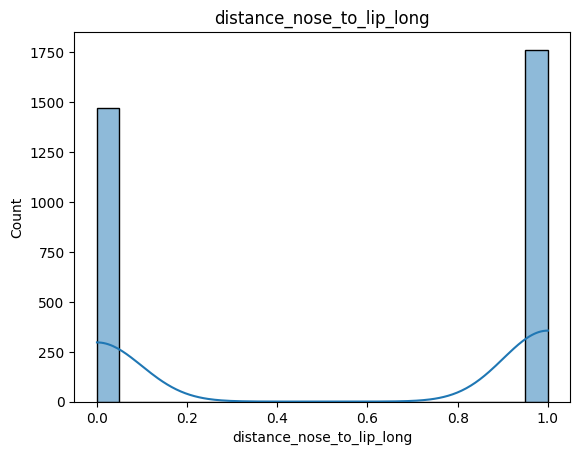

In [12]:
for i in numerical_column:
     sns.histplot(x=df[i],bins=20,kde=True)
     plt.title(''+i)
     plt.show()

In [13]:
#univariate-categorical_column

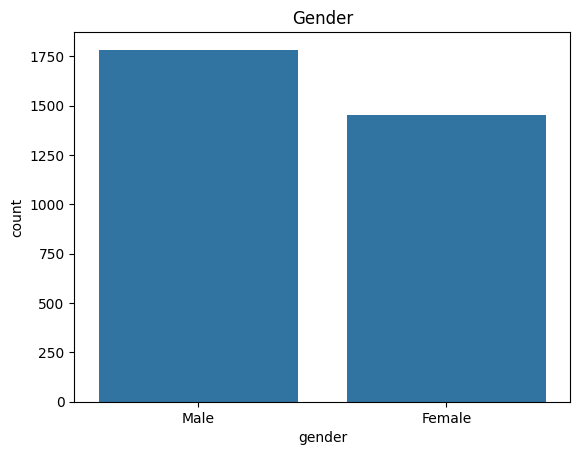

In [14]:
sns.countplot(x=df['gender'])
plt.title('Gender')
plt.show()

multivariate-numericalvscategorical

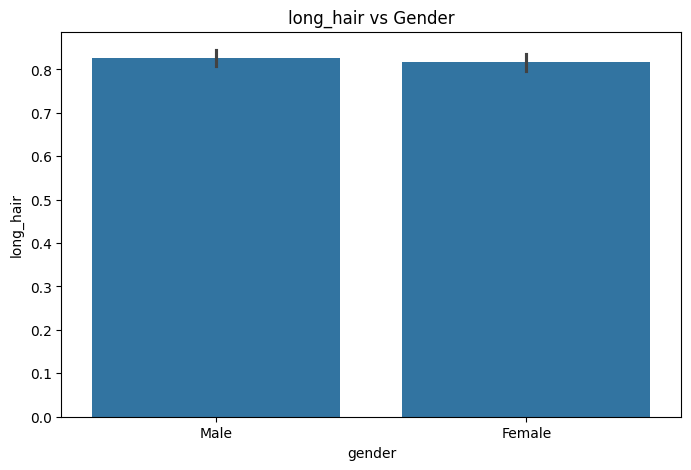

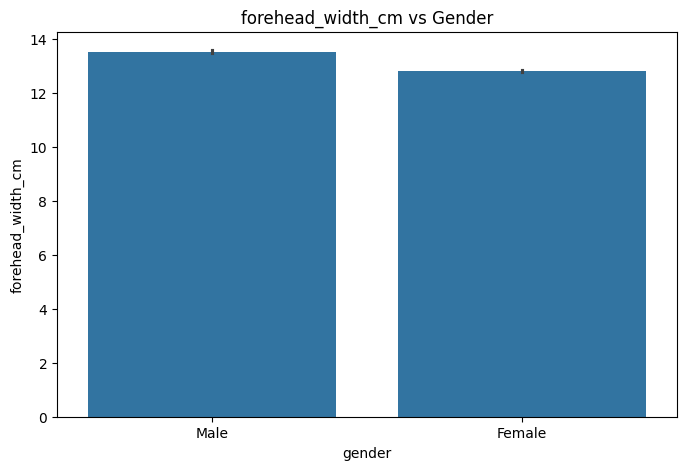

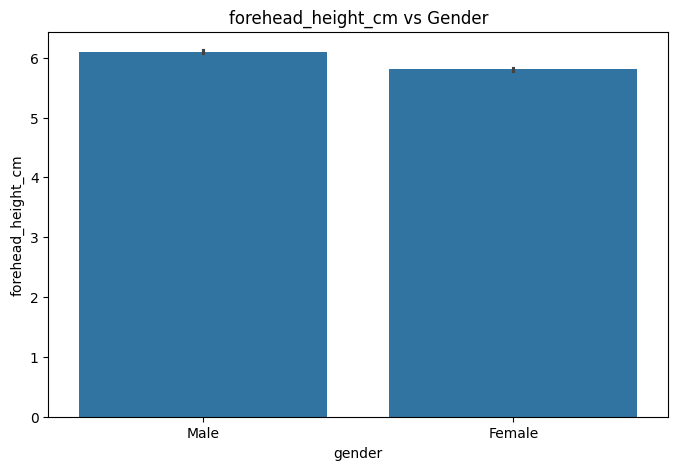

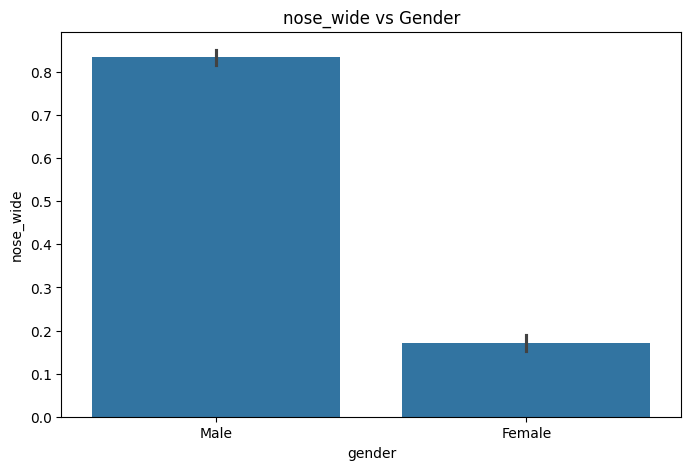

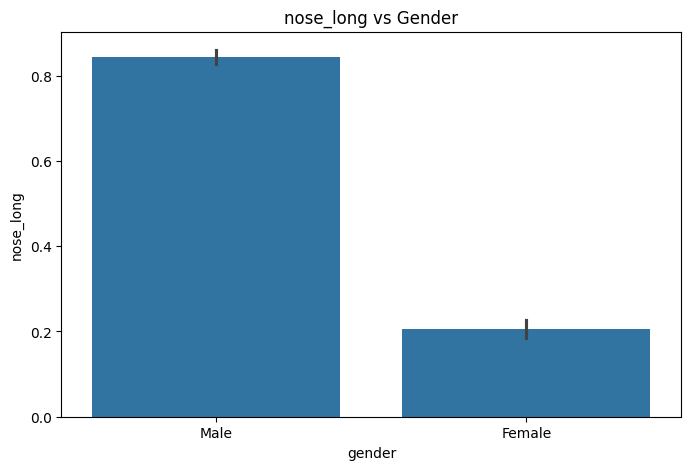

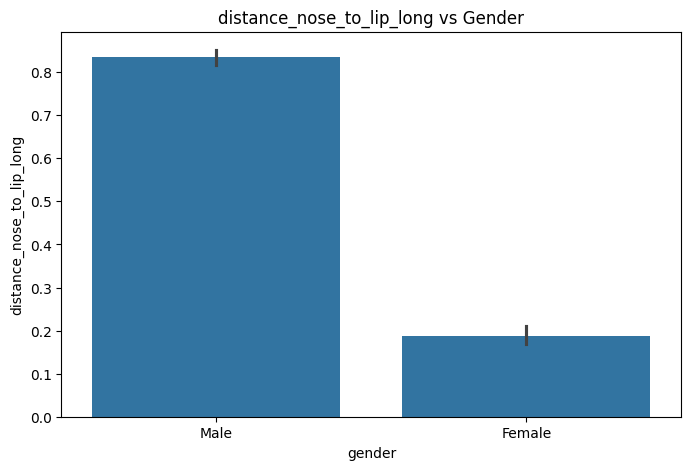

In [15]:
for i in numerical_column:
    if i!='lips_thin': # i was forget to add on the categorical column
        plt.figure(figsize=(8, 5))  
        sns.barplot(x=df['gender'], y=df[i])  
        plt.title(f"{i} vs Gender") 
        plt.show()

In [16]:
# categorical vs categorical_column

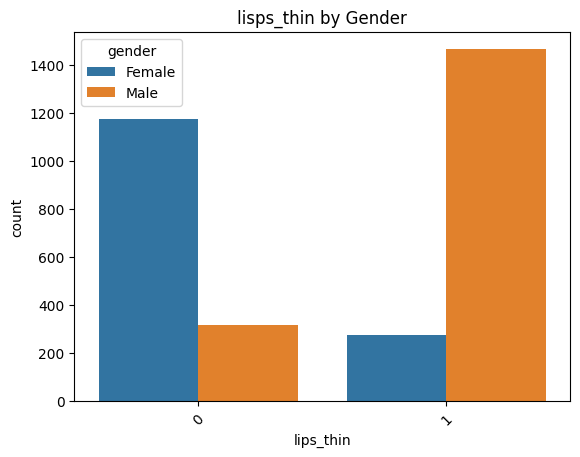

In [17]:


sns.countplot(x=df['lips_thin'],hue=df['gender'])
plt.title("lisps_thin by Gender")
plt.xticks(rotation=45)
plt.show()

Multivariate

In [18]:
#Numericalcolumns

In [19]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
3228,1,11.7,6.1,1,1,0,1,Male
3229,1,12.6,5.7,0,0,1,0,Female
3230,1,14.1,7.0,1,1,1,1,Male
3231,1,11.6,5.9,0,0,0,1,Female


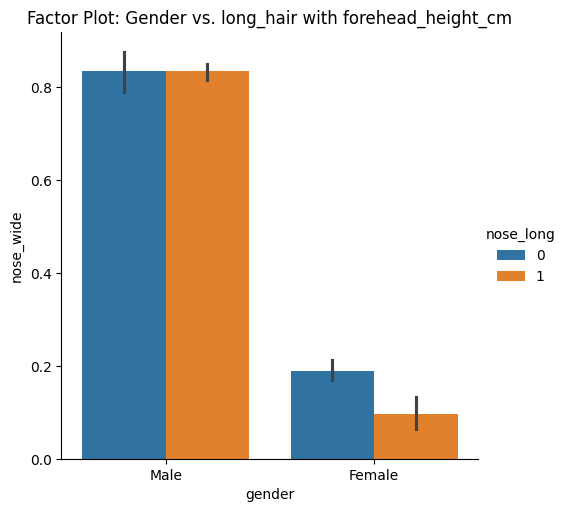

In [20]:
sns.catplot(x="gender", y="nose_wide", hue="nose_long", kind="bar", data=df)
plt.title("Factor Plot: Gender vs. long_hair with forehead_height_cm")
plt.show()

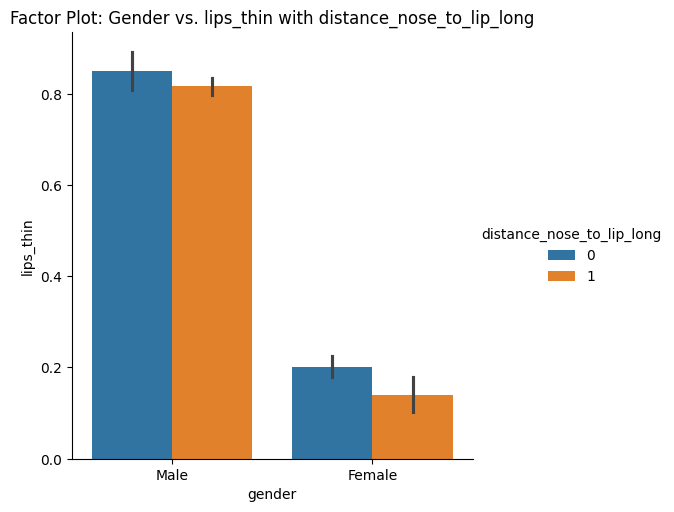

In [21]:
sns.catplot(x="gender", y="lips_thin", hue="distance_nose_to_lip_long", kind="bar", data=df)
plt.title("Factor Plot: Gender vs. lips_thin with distance_nose_to_lip_long")
plt.show()

Label encoding 

In [22]:
df['gender']

0         Male
1       Female
2         Male
3         Male
4       Female
         ...  
3228      Male
3229    Female
3230      Male
3231    Female
3232      Male
Name: gender, Length: 3233, dtype: object

In [23]:
lb=LabelEncoder()
df['gender']=lb.fit_transform(df['gender'])
print(lb.classes_)


['Female' 'Male']


C:\Users\akhil\AppData\Local\Temp\ipykernel_16472\201932691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender']=lb.fit_transform(df['gender'])


In [24]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
3228,1,11.7,6.1,1,1,0,1,1
3229,1,12.6,5.7,0,0,1,0,0
3230,1,14.1,7.0,1,1,1,1,1
3231,1,11.6,5.9,0,0,0,1,0


cheking_quarilation

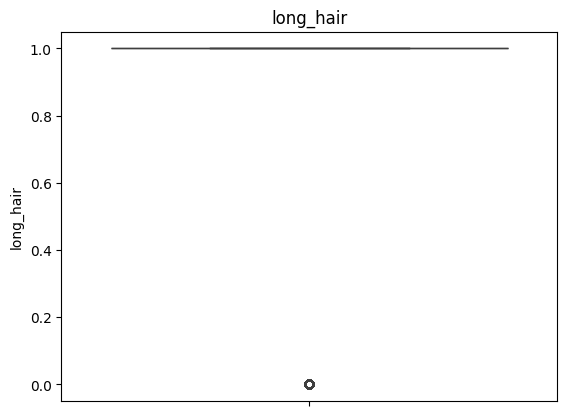

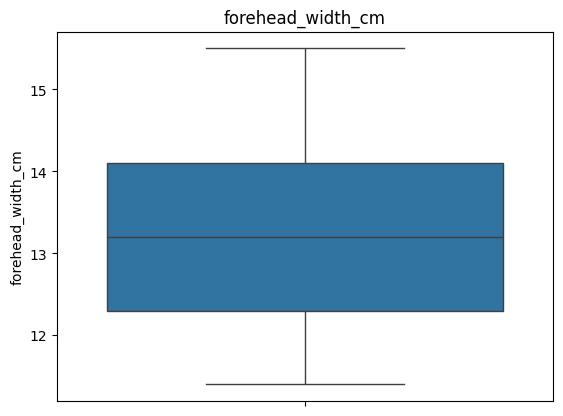

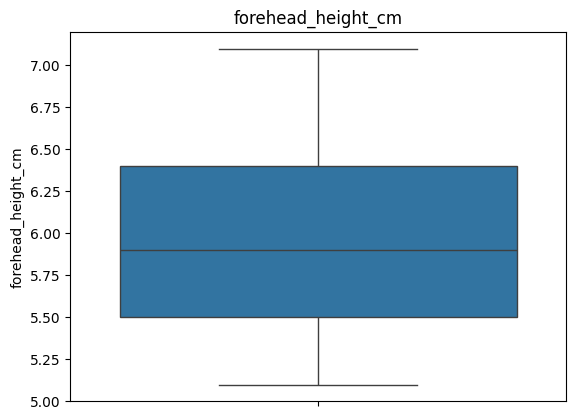

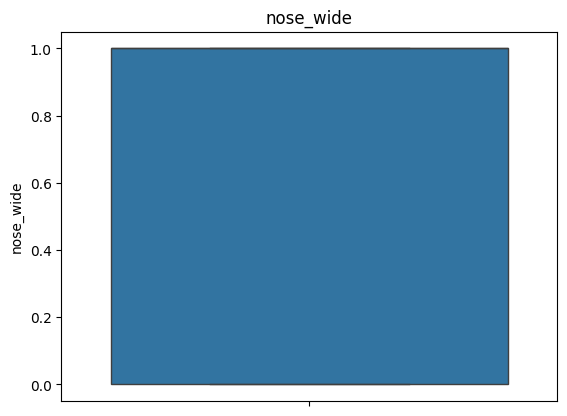

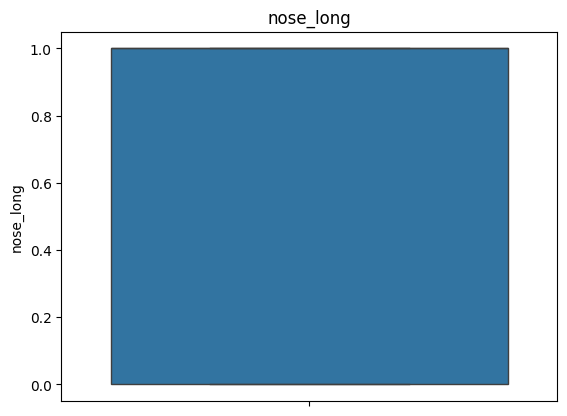

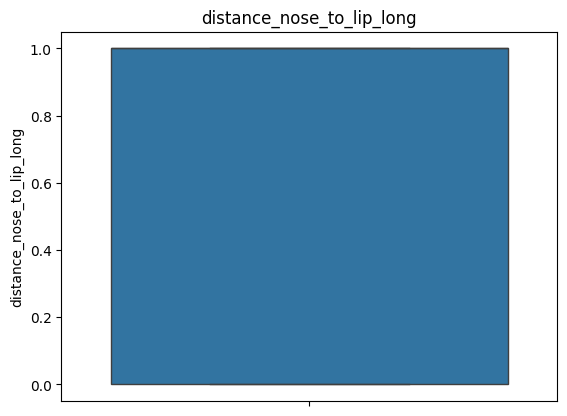

In [25]:
for i in numerical_column:
    if i!="lips_thin":
       sns.boxplot(y=df[i])
       plt.title(f"{i}")
       plt.show()

In [26]:


# Calculate IQR (Interquartile Range)
Q1 = df['long_hair'].quantile(0.25)
Q3 = df['long_hair'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
Minimum = Q1 - 1.5 * IQR
Maximum = Q3 + 1.5 * IQR

# Apply outlier capping directly on 'long_hair'
df['long_hair'] = np.where(df['long_hair'] > Maximum, Maximum, 
                           np.where(df['long_hair'] < Minimum, Minimum, df['long_hair']))

# Print new shape after outlier capping
print("New shape after outlier capping:", df.shape)


New shape after outlier capping: (3233, 8)


C:\Users\akhil\AppData\Local\Temp\ipykernel_16472\177277598.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['long_hair'] = np.where(df['long_hair'] > Maximum, Maximum,


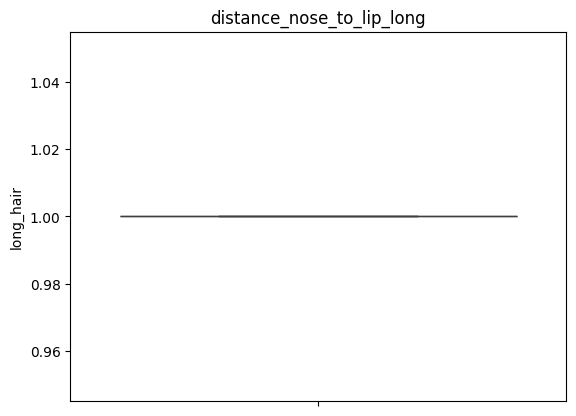

In [27]:
sns.boxplot(y=df['long_hair'])
plt.title(f"{i}") 
plt.show()

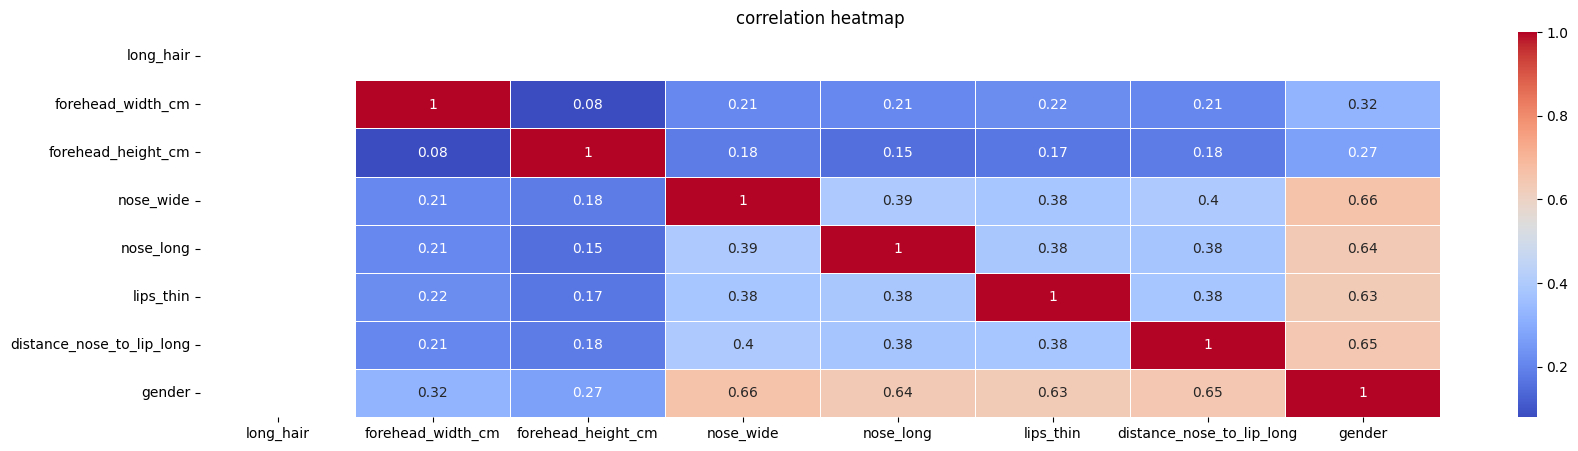

In [28]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",linewidths=0.5)
plt.title('correlation heatmap')
plt.show()

In [29]:
list=[]
corr_matrix=df.corr()
for i in df.columns:
    if corr_matrix['gender'][i]<- 0.5 or corr_matrix['gender'][i] > 0.5:
        list.append(i)

In [30]:
df=df[list]

In [31]:
df

,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,0,1,1,1
1,0,0,1,0,0
2,1,1,1,1,1
3,0,1,1,1,1
4,0,0,0,0,0
...,...,...,...,...,...
3228,1,1,0,1,1
3229,0,0,1,0,0
3230,1,1,1,1,1
3231,0,0,0,1,0


In [32]:
#Data splitting

In [33]:
x=df.drop(columns="gender")
y=df['gender']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [35]:
x_train.shape

(2586, 4)

In [36]:
df.shape

(3233, 5)

In [37]:
y_train.shape

(2586,)

# Scalling

In [41]:
scaler = StandardScaler()  # Initialize the scaler

# Fit the scaler on the training data and transform it
X_train_scaled = x_train.copy()
X_train_scaled[['nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']] = scaler.fit_transform(
    X_train_scaled[['nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']]
)

# Transform the testing data using the same scaler
X_test_scaled = x_test.copy()
X_test_scaled[['nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']] = scaler.transform(
    X_test_scaled[['nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']]
)


Model Building

In [44]:
df

,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,0,1,1,1
1,0,0,1,0,0
2,1,1,1,1,1
3,0,1,1,1,1
4,0,0,0,0,0
...,...,...,...,...,...
3228,1,1,0,1,1
3229,0,0,1,0,0
3230,1,1,1,1,1
3231,0,0,0,1,0


In [42]:
knn=KNeighborsClassifier(n_neighbors=51)

In [45]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=51)

In [46]:
knn.score(X_train_scaled,y_train)

0.9396751740139211

In [47]:
knn.score(X_test_scaled,y_test)

0.9319938176197836

In [48]:
X_train_scaled.head()

,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
361,0.922556,0.887212,0.916112,-1.109610
135,0.922556,0.887212,-1.091570,-1.109610
1831,0.922556,-1.127126,0.916112,0.901218
2341,0.922556,-1.127126,0.916112,-1.109610
1206,-1.083945,-1.127126,-1.091570,-1.109610


In [49]:
y_train.head()

361     1
135     0
1831    1
2341    1
1206    0
Name: gender, dtype: int64

In [52]:
y_pred=knn.predict(X_test_scaled)

In [51]:
knn.predict([[0.922556,0.887212,0.916112,-1.109610]])

c:\Users\akhil\Documents\preprocessing\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [53]:
dataframe=pd.DataFrame({'predicted_value':y_pred,'Actual value':y_test})

In [55]:
dataframe.head(2)

,predicted_value,Actual value
1022,0,1
1398,0,0


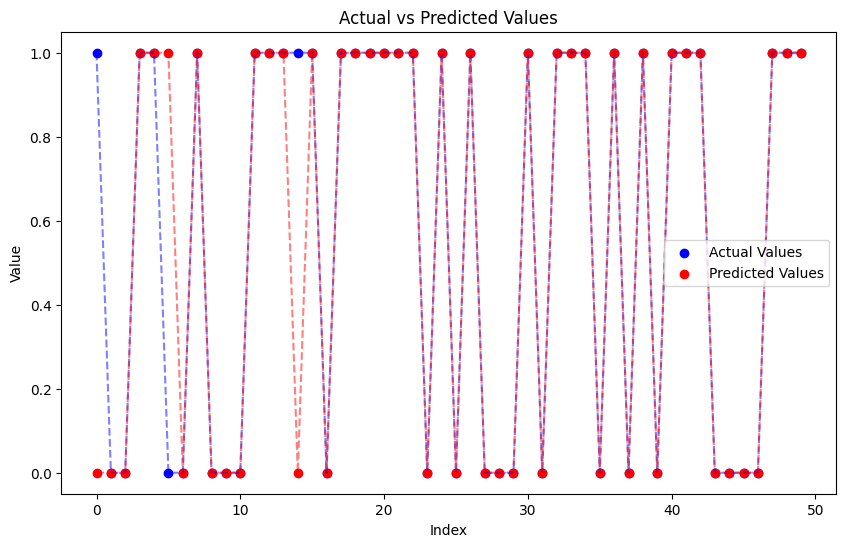

In [57]:

plt.figure(figsize=(10, 6))

# Scatter plots for actual vs predicted values
plt.scatter(range(50), y_test[:50], color='blue', label='Actual Values')
plt.scatter(range(50), y_pred[:50], color='red', label='Predicted Values')

# Line plots for better visualization
plt.plot(range(50), y_test[:50], color='blue', linestyle='dashed', alpha=0.5)
plt.plot(range(50), y_pred[:50], color='red', linestyle='dashed', alpha=0.5)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
